### import  Libraries ##

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


### Load The Data ###

In [10]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('fulfilment_center_info.csv')
df3 = pd.read_csv('meal_info.csv')

In [11]:
combined_df = pd.merge(df1,df3,on='meal_id')

In [12]:
df = pd.merge(combined_df,df2,on='center_id')

### Data Exploring ###

In [14]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [16]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

### Visualisation of the data ###

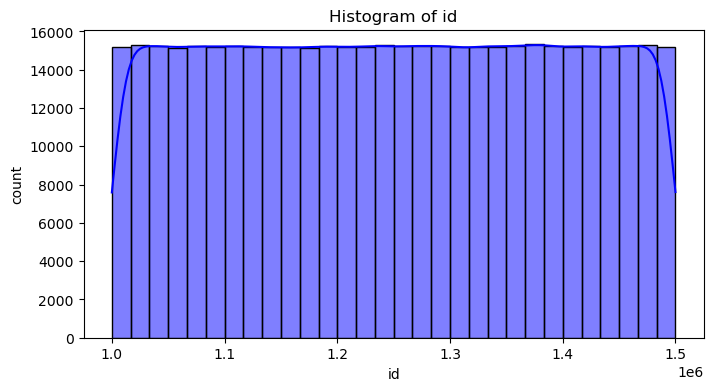

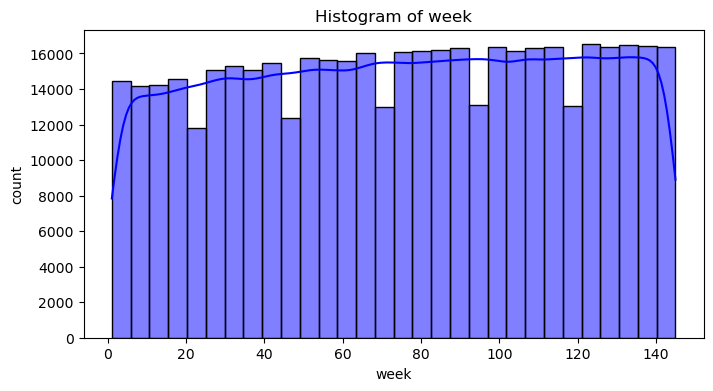

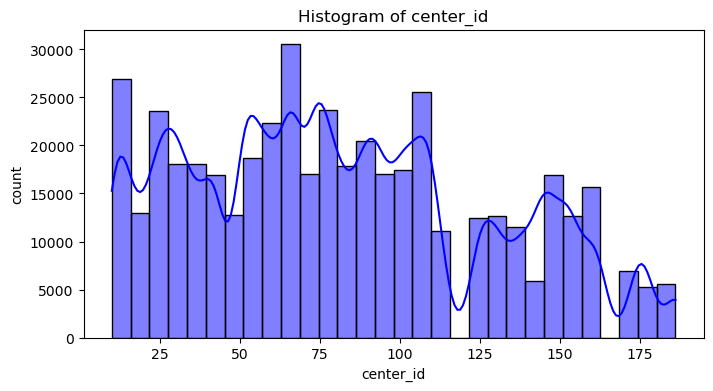

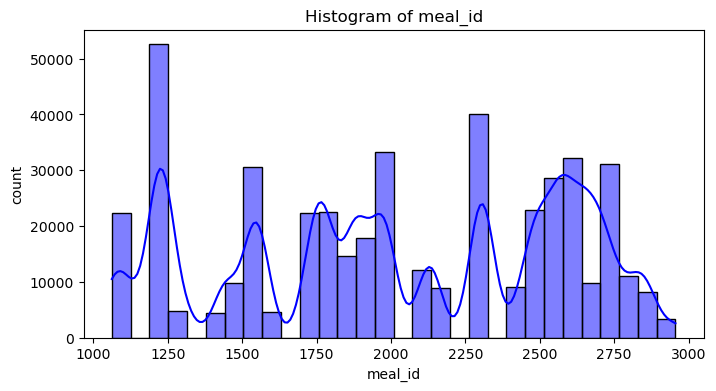

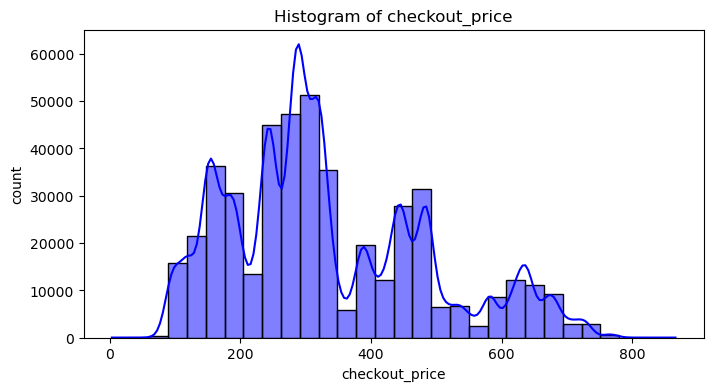

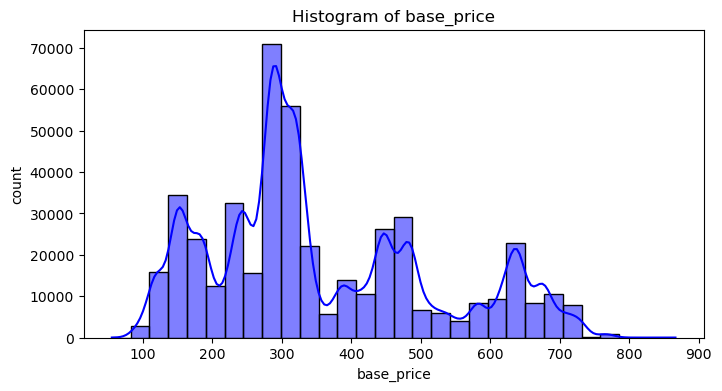

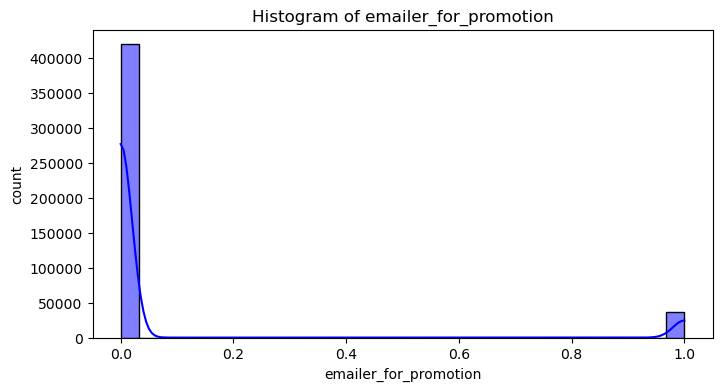

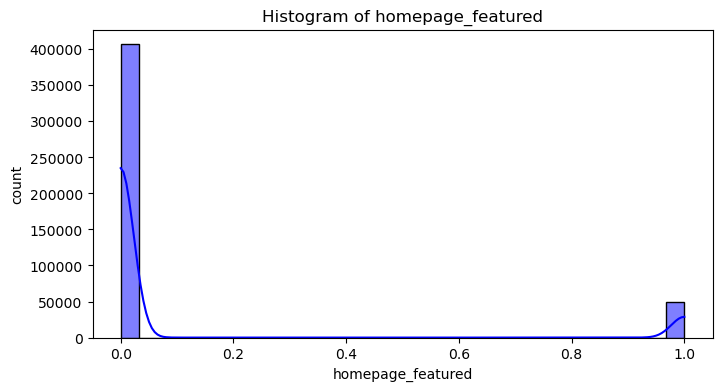

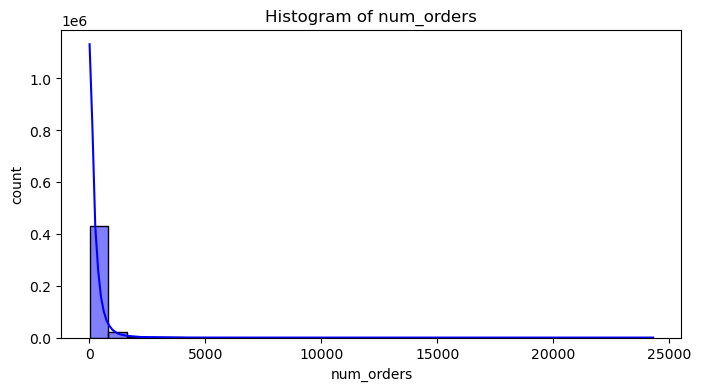

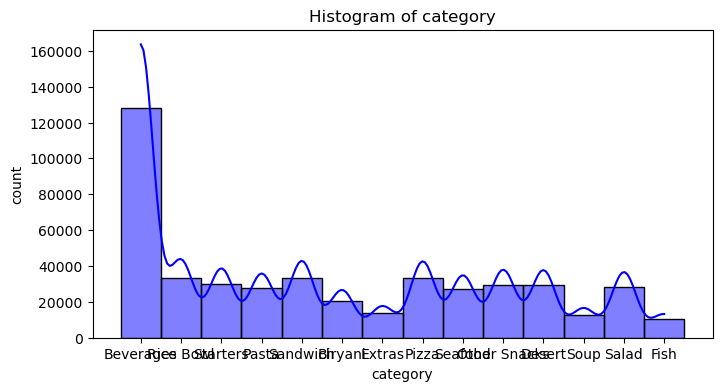

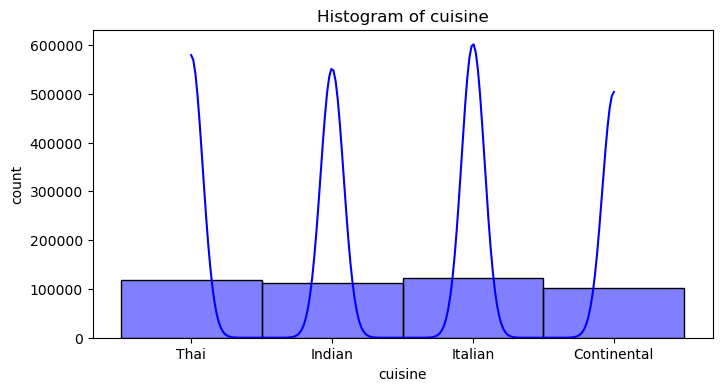

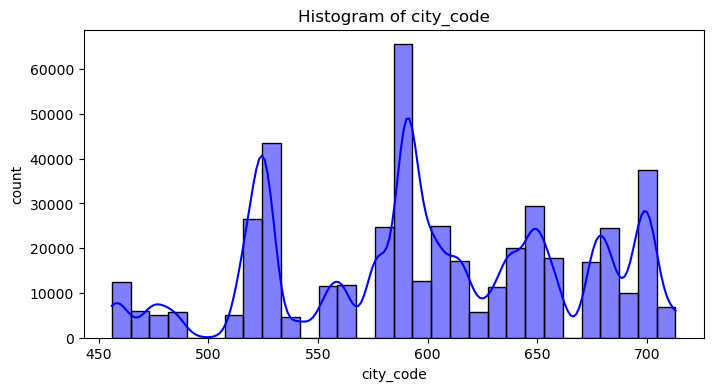

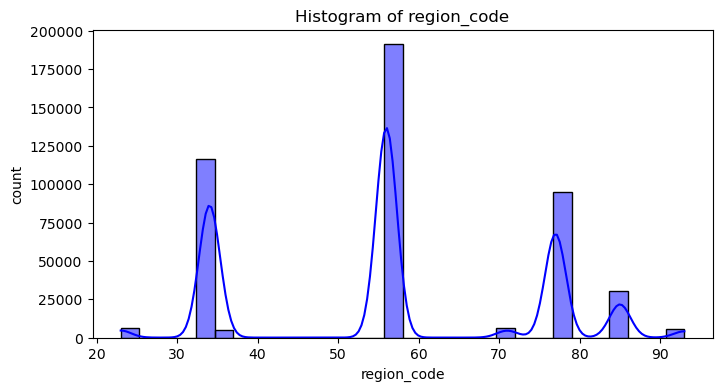

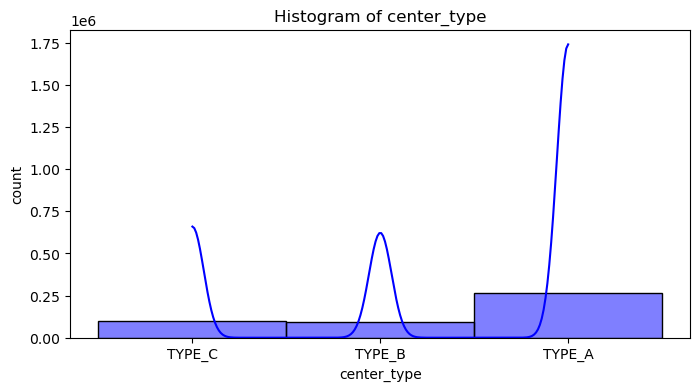

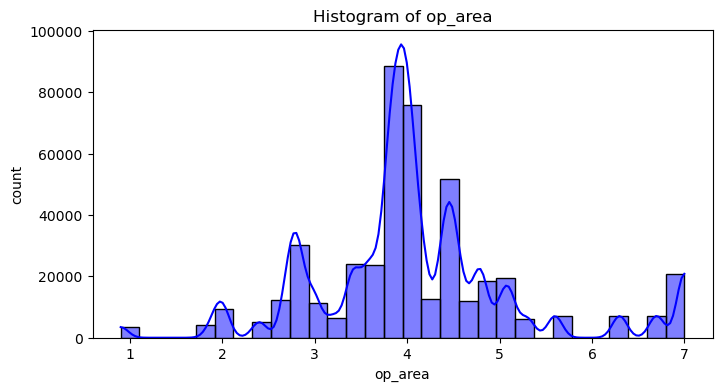

In [20]:
for col in df:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()


In [21]:
num_df = df.select_dtypes(include="number")

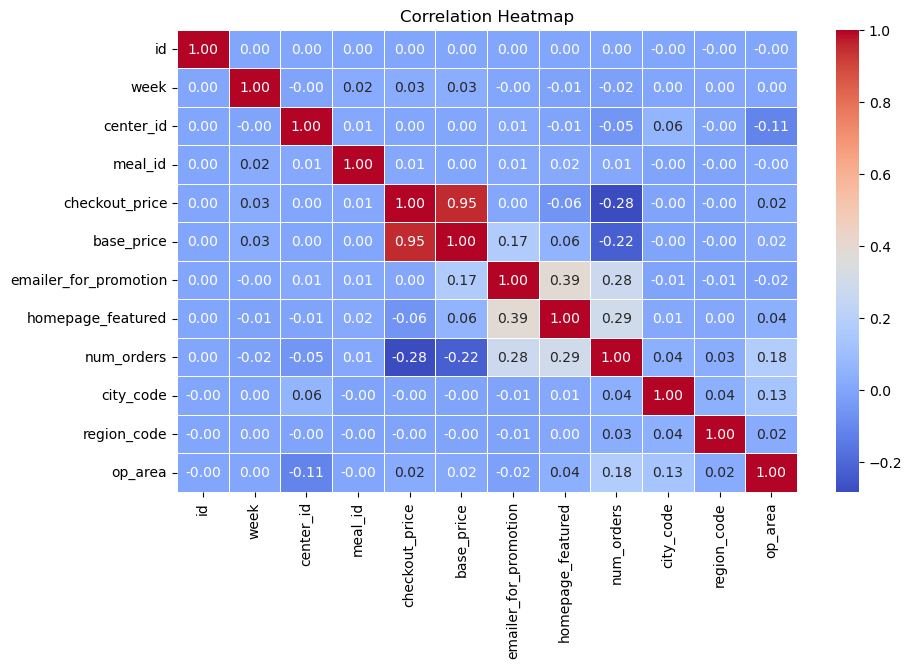

In [22]:
### correlation metrix ###

plt.figure(figsize=(10, 6))

sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Outlier Remover ###

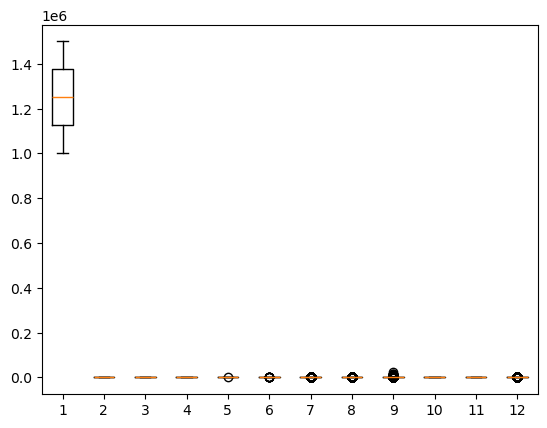

In [24]:
plt.boxplot(num_df)
plt.show()

In [25]:
# One hot encoding for columns in training dataset
df = pd.get_dummies(df,columns=['category','cuisine','center_type'],dtype= int,drop_first=True)
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,1,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,...,0,0,0,0,0,0,0,1,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,...,0,0,0,0,0,0,0,1,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,...,0,0,0,0,0,1,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,...,0,0,0,0,0,1,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,...,0,0,0,0,0,1,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,...,1,0,0,0,0,0,1,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,...,1,0,0,0,0,0,1,0,0,0


In [26]:
x = df.drop('num_orders',axis=1)
y = ['num_orders']

In [27]:
# min max scaling for faetures having non-gaussian distribution in training dataset
min_scaler = MinMaxScaler()
numerical_colms1 = ['emailer_for_promotion','homepage_featured']
df[numerical_colms1] = min_scaler.fit_transform(df[numerical_colms1])
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0.0,0.0,177,647,...,0,0,0,0,0,0,0,1,0,1
1,1466964,1,55,1993,136.83,135.83,0.0,0.0,270,647,...,0,0,0,0,0,0,0,1,0,1
2,1346989,1,55,2539,134.86,135.86,0.0,0.0,189,647,...,0,0,0,0,0,0,0,1,0,1
3,1338232,1,55,2139,339.50,437.53,0.0,0.0,54,647,...,0,0,0,0,0,1,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0.0,0.0,40,647,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0.0,0.0,68,473,...,0,0,0,0,0,1,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0.0,0.0,42,473,...,0,0,0,0,0,1,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0.0,0.0,501,473,...,1,0,0,0,0,0,1,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0.0,0.0,729,473,...,1,0,0,0,0,0,1,0,0,0


In [28]:
# standard scaling for features having gaussian distribution in training dataset
std_scaler = StandardScaler()
numerical_colms3 = ['week','center_id','meal_id','city_code','region_code','op_area']
df[numerical_colms3] = std_scaler.fit_transform(df[numerical_colms3])
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,-1.776494,-0.589577,-0.254535,136.83,152.29,0.0,0.0,177,0.686548,...,0,0,0,0,0,0,0,1,0,1
1,1466964,-1.776494,-0.589577,-0.057246,136.83,135.83,0.0,0.0,270,0.686548,...,0,0,0,0,0,0,0,1,0,1
2,1346989,-1.776494,-0.589577,0.940160,134.86,135.86,0.0,0.0,189,0.686548,...,0,0,0,0,0,0,0,1,0,1
3,1338232,-1.776494,-0.589577,0.209460,339.50,437.53,0.0,0.0,54,0.686548,...,0,0,0,0,0,1,0,0,0,1
4,1448490,-1.776494,-0.589577,1.108221,243.50,242.50,0.0,0.0,40,0.686548,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,1.691304,-0.459071,-0.879283,484.09,484.09,0.0,0.0,68,-1.942016,...,0,0,0,0,0,1,0,0,0,0
456544,1062036,1.691304,-0.459071,0.510874,482.09,482.09,0.0,0.0,42,-1.942016,...,0,0,0,0,0,1,0,0,0,0
456545,1110849,1.691304,-0.459071,1.168503,237.68,321.07,0.0,0.0,501,-1.942016,...,1,0,0,0,0,0,1,0,0,0
456546,1147725,1.691304,-0.459071,0.994962,243.50,313.34,0.0,0.0,729,-1.942016,...,1,0,0,0,0,0,1,0,0,0


In [29]:
# Seperating Features and labels
x = df.drop('num_orders',axis=1)
y = df['num_orders']


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [31]:
reg_lin = LinearRegression()
reg_lin.fit(x_train,y_train)
y_pred = reg_lin.predict(x_test)

In [59]:
# Making Predictions  
y_pred = model.predict(x_test)    

# Calculate evaluation metrics  
mae = mean_absolute_error(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

# Print the evaluation metrics  
print(f'Mean Absolute Error (MAE): {mae:.2f}')  
print(f'Mean Squared Error (MSE): {mse:.2f}')  
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 161.16
Mean Squared Error (MSE): 93964.37
R² Score: 0.40


## Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = Lasso(alpha=0.1)
model.fit(x, y)
y_pred = model.predict(x_test)
mse_poly = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_poly:}') 

Mean Squared Error (MSE): 93964.37315869353


In [61]:
result_df = pd.DataFrame(y_pred)
result_df

,0
0,6.052732
1,476.621016
2,16.115760
3,42.821469
4,275.617636
...,...
91305,-261.553241
91306,505.004458
91307,18.027914
91308,704.397948


In [63]:
id_series = pd.Series(id)
result_df = pd.concat([id_series,result_df],axis = 1)
result_df.rename(columns={0 : 'num_orders'}, inplace=True)

In [65]:
result_df = result_df.iloc[:,-1:2]

In [67]:
result_df

,num_orders
0,6.052732
1,476.621016
2,16.115760
3,42.821469
4,275.617636
...,...
91305,-261.553241
91306,505.004458
91307,18.027914
91308,704.397948


In [ ]:
result_df.read_csv